# Random Forest
- Random Forest is a supervised Machine Learning algorithm that uses ensemble of decision trees to make predictions.
- It is used to Handle both classification and regression

## How it Works
- it works by constructing of multiple decison trees.


## Step 1
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Step 2
# Import Dataset

In [3]:
churn = pd.read_csv("customer_churn_dataset-training-master.csv")


## Step 3
# Explore Data

In [4]:
churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
churn.dtypes


CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [7]:
churn.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [8]:
churn['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [9]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


## Step 4
# Data Preprocessing

In [14]:
churn.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [11]:
churn.dropna(inplace= True)

In [31]:
churn.drop('CustomerID', axis=1, inplace = True)

In [32]:
churn.dtypes

Age                  float64
Gender                 int32
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int32
Contract Length        int32
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in churn.columns:
    if churn[column].dtype == 'object':
        churn[column] = le.fit_transform(churn[column])
        

## Step 5
# Train - Test - Split

In [34]:
#split the data (target and feature)

X = churn.drop('Churn', axis = 1) #feature 
y = churn['Churn'] #target 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)

## Step 6
# Train Model ( Random Forest Model )

In [48]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 40)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

## Step 7
# Evaluate The Model

In [50]:
y_pred = rf.predict(X_test)

In [51]:
print("Accuracy",accuracy_score(y_test, y_pred))

Accuracy 0.9997731577574376


In [52]:
print("confusion Matrix",confusion_matrix(y_test, y_pred))

confusion Matrix [[38116     1]
 [   19 50031]]


In [53]:
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38117
         1.0       1.00      1.00      1.00     50050

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



## Step 8
# Visualizations

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

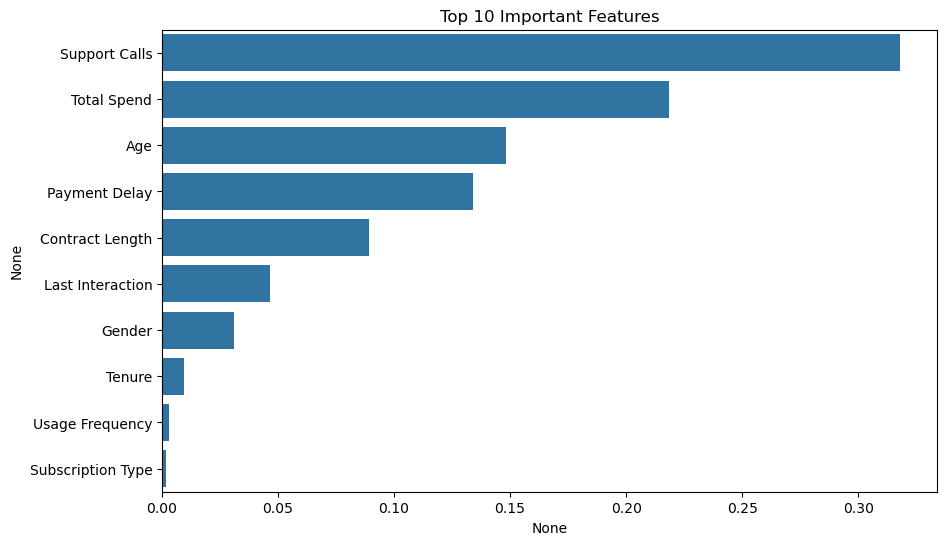

In [55]:
feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.title("Top 10 Important Features")
plt.show()

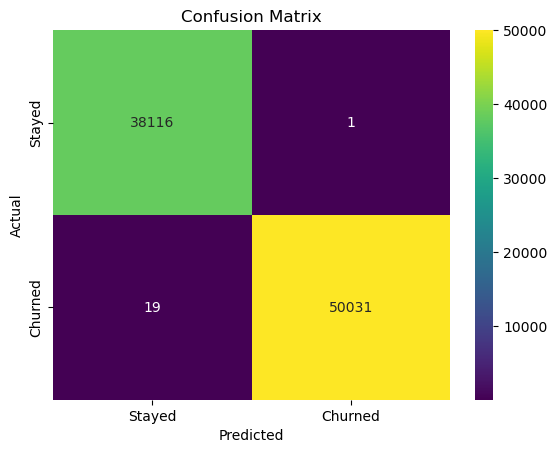

In [56]:

cm = confusion_matrix(y_test, y_pred)

#plot
sns.heatmap(cm, annot = True, fmt = 'd' , cmap = 'viridis', xticklabels = ['Stayed', 'Churned'], yticklabels = ['Stayed','Churned'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Homework for 20 May
- Understand all four models and differnces (Linear, Logistic, Decision Trees & random Forest).
- Go through Data Preprocessing again.
- also add 2 more plots to random forest.